In [168]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения


In [169]:
data = pd.read_csv('housing.csv')

In [170]:
data['ocean_proximity'] = data['ocean_proximity'].astype('category')


data_new = data

Ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'])
data_new = pd.concat((data_new, Ocean_proximity_dummies), axis=1)

data_new = data_new.drop(['ocean_proximity'], axis=1)
data_new = data_new.drop(['longitude'], axis=1)
data_new = data_new.drop(['latitude'], axis=1)


In [171]:
data_new['total_bedrooms'].fillna(data_new['total_bedrooms'].mode().iloc[0], inplace=True)
data_new.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [172]:
data_stand = (data_new - data_new.mean(axis = 0))/data_new.std(axis = 0)

In [173]:
for i in range(len(data_stand)):
  if data_stand['median_income'][i]>0:
    data_stand['median_income'][i] = 1
  else :
    data_stand['median_income'][i] = 0
data_stand


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.982119,-0.804800,-0.967221,-0.974405,-0.977009,1.0,2.129580,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
1,-0.607004,2.045841,1.358675,0.861418,1.669921,1.0,1.314124,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
2,1.856137,-0.535733,-0.822001,-0.820757,-0.843616,1.0,1.258663,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
3,1.856137,-0.624199,-0.714872,-0.766010,-0.733764,1.0,1.165072,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
4,1.856137,-0.462393,-0.607743,-0.759828,-0.629142,0.0,1.172871,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.289180,-0.444974,-0.383962,-0.512579,-0.443438,0.0,-1.115777,-0.891134,1.466479,-0.015566,-0.353256,-0.384457
20636,-0.845373,-0.888682,-0.917227,-0.944382,-1.008396,0.0,-1.124443,-0.891134,1.466479,-0.015566,-0.353256,-0.384457
20637,-0.924829,-0.174991,-0.119709,-0.369528,-0.174037,0.0,-0.992722,-0.891134,1.466479,-0.015566,-0.353256,-0.384457
20638,-0.845373,-0.355591,-0.300639,-0.604415,-0.393743,0.0,-1.058583,-0.891134,1.466479,-0.015566,-0.353256,-0.384457


In [174]:
data_new = data_stand

In [175]:
X = data_new.drop(['median_income'], axis=1)
y = data_new['median_income']


In [176]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
import seaborn as sns  
sc = StandardScaler()
X_train_std = sc.fit_transform(X)

In [177]:
scaled_data_train = X_train_std

In [178]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
# cov_mat

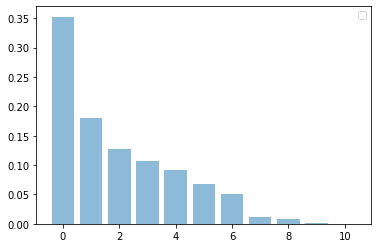

In [179]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
plt.bar(range(0,11), var_exp, alpha=0.5,
        align='center')
plt.legend(loc='best')
plt.show()

In [180]:
X = pd.DataFrame(X)
Y = pd.DataFrame(y)

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
import seaborn as sns  
sc = StandardScaler()
X_train_std = sc.fit_transform(X)

scaled_data_train = pd.DataFrame(X_train_std)


pca_train = PCA(n_components = 6)
pca_train.fit(scaled_data_train)
data_pca_X_train = pca_train.transform(scaled_data_train)
data_pca_X_train = pd.DataFrame(data_pca_X_train)
     

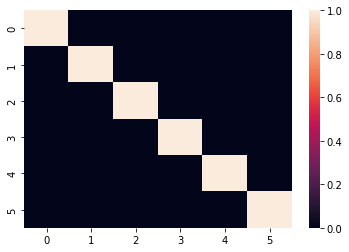

In [181]:
sns.heatmap(data_pca_X_train.corr())

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

N_train = int(len(data_pca_X_train) * 0.8)
N_test = len(data_pca_X_train) - N_train

X_train, X_test, Y_train, Y_test = train_test_split(data_pca_X_train, Y, 
                                                    train_size = N_train, test_size = N_test, 
                                                    stratify = Y, random_state = 6)

In [196]:
error_rates = []
for i in np.arange(1, 30):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X_train, Y_train)
    new_predictions = new_model.predict(X_test)
    error_rates.append(1 - new_model.score(X_test, Y_test))

min(error_rates)
ind = error_rates.index(min(error_rates))



/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [194]:
new_model = KNeighborsClassifier(n_neighbors = ind+1)
new_model.fit(X_train, Y_train)
new_predictions = new_model.predict(X_train)

0

In [197]:
knn = KNeighborsClassifier(n_neighbors = ind+1)
knn.fit(X_train, Y_train)


y_test_predict = knn.predict(X_test)
err_train = 1 - knn.score(X_train, Y_train)
err_test = 1 - knn.score(X_test, Y_test)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')
     

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Ошибка на обучении: 20.61531007751938%
Ошибка на тесте: 22.650193798449614%


При использовании PCA ошибка стала больше




Ошибка без PCA:

err train = 0.14266046023733037;  err test = 0.1750245821042281

Отсюда следует сделать вывод, что для данной задачи нужны все параметры, тк при понижении размерности ошибка возрастает. 